In [10]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [36]:
 class GradientBoosting:
    """
    Base class for regression and classification
    """
    def __init__(self, n_estimators, learning_rate, min_samples_split,
                 max_depth, regression):
        """
        Seting most important attributes
        
        Parameters
        ----------
        n_estimators : int
            Number of trees used for predicting.
        learning_rate : int or float
            learning rate shrinks the contribution of each tree by learning_rate. 
            There is a trade-off between learning_rate and n_estimators.
        min_sample_split : int or float
            The minimum number of samples required to split an internal node
        max_depth : int
            maximum depth for individual tree. Low value can lead to underfiting
            and too high to overfitting.
        """
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.regression = regression
        
        self.trees = []
        for _ in range(n_estimators):
            tree = DecisionTreeRegressor(min_samples_split=self.min_samples_split, 
                                         max_depth=self.max_depth)
            self.trees.append(tree)
    
            
    def get_residuals(self, Y, Y_pred):
        return -(Y - Y_pred)
            
    def fit(self, X, Y):
        """
        The idea of fitting is very simple. First of all we need to calculate
        mean for labels (first prediction). Next calculate residuals residuals
        for the prediction and true value. Residuals are then used to train 
        single tree. Lastly using trained tree update first prediction. 
        The procedure should be repeated with every tree.
        
        Parameters
        ----------
        X : np.array
            Training data
        Y : np.array
            labels
        """
        self.starting_mean = np.mean(Y)
        Y_pred = np.full(len(Y), self.starting_mean).reshape(-1,1)
        for i in range(self.n_estimators):
            residuals = self.get_residuals(Y, Y_pred)
            self.trees[i].fit(X, residuals)
            new_pred = self.trees[i].predict(X)
            Y_pred -= self.learning_rate * new_pred.reshape(-1,1)
            
    def predict(self, X):
        """
        Start with mean (the first prediction) and then used trained trees
        to get a new prediction. Old prediction is updated using new prediction
        and learning rate. Repeat that for every tree.
        
        Parameters
        ----------
        X : np.array
            Training data
        """
        Y_pred = self.starting_mean
        for tree in self.trees:
            new_pred = tree.predict(X)
            Y_pred -= self.learning_rate * new_pred
        return Y_pred
    
class GradientBoostingRegressor(GradientBoosting):
    def __init__(self, n_estimators=100, learning_rate=0.1, 
                 min_samples_split=2, max_depth=3):
        super().__init__(n_estimators=n_estimators, 
                         learning_rate=learning_rate,
                         min_samples_split=min_samples_split, 
                         max_depth=max_depth,
                         regression=True)
        
class GradientBoostingClassifier(GradientBoosting):
    def __init__(self):
        pass

R2 score 0.9733915585137565


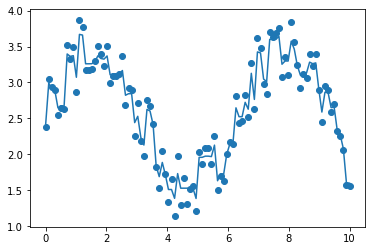

In [44]:
rng = np.random.RandomState(42)
X = np.linspace(0, 10, 100)
Y = 2 + np.sin(X) + rng.rand(100)
plt.scatter(X, Y)
model = GradientBoostingRegressor()
model.fit(X.reshape(-1,1), Y.reshape(-1, 1))
Y_pred = model.predict(X.reshape(-1,1))
print(f'R2 score {r2_score(Y, Y_pred)}')
plt.plot(X, Y_pred)

R2 score 0.9733915585137565


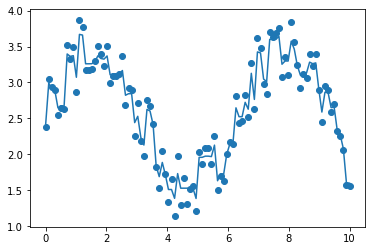

In [41]:
from sklearn.ensemble import GradientBoostingRegressor as gb_sklearn

true_model = gb_sklearn()
true_model.fit(X.reshape(-1,1), Y)
Y_sklearn = true_model.predict(X.reshape(-1,1))
plt.scatter(X, Y)
print(f'R2 score {r2_score(Y, Y_sklearn)}')
plt.plot(X, Y_sklearn)